# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "f956df277a83558a768d1d55d1173e35496654b6"
connection.set_access_token(API_TOKEN)

# Strategy Creation

In [5]:
from vwap_crossover import VWAPCrossover as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 130226,
 'strategyId': '35cc37da1a634b90a338871f15cac233'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('TSLA', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:TSLA'

## Setup Parameters

In [9]:
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKFWEIK28TM4F3NNEYHR', 
        'CLIENT_API_SECRET': '2RaicNUeV8BWIT8qd3S8wOAqMFLwoRESuM37d5tD'
    }
}

In [10]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [11]:
parameters = {
  'TIMEPERIOD': 12,
}

In [12]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

### Start

In [13]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:TSLA', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    vendor_details=vendor_details,
    initial_funds_virtual=initial_virtual_funds
    
)


Starting the strategy 'VWAP Crossover US' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Vendor Name             │ ALPACAV2                  │
├─────────────────────────┼───────────────────────────┤
│ Strategy Name           │ VWAP Crossover US         │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ BACKTESTING               │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:TSLA']           │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 5                         │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00-04:00 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2023-07-31 15:30:00-04:00 │
├─────────────────────────┼───────────

### Status

In [14]:
connection.get_backtesting_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [15]:
logs = connection.get_backtesting_logs(strategy)

In [16]:
print(logs)

[2023-08-22 20:08:24] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 20:08:24] Sanity checks on cfg successful.
[2023-08-22 20:08:24] Currency set to "USD"
[2023-08-22 20:08:24] Setting up broker connection...
[2023-08-22 20:08:27] Broker connection has been setup successfully.
[2023-08-22 20:08:27] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2023-08-22 20:08:27] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 20:08:27] Welcome ALGOBULLS VIRTUAL USER!
[2023-08-22 20:08:27] Reading strategy...
[2023-08-22 20:08:27] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #   

### Stop

In [17]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [18]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0               NASDAQ                     TSLA 2021-08-02 12:30:00-04:00   
1               NASDAQ                     TSLA 2021-08-02 13:30:00-04:00   
2               NASDAQ                     TSLA 2021-08-02 14:30:00-04:00   
3               NASDAQ                     TSLA 2021-08-03 09:30:00-04:00   
4               NASDAQ                     TSLA 2021-08-03 10:30:00-04:00   
..                 ...                      ...                       ...   
630             NASDAQ                     TSLA 2023-07-26 10:30:00-04:00   
631             NASDAQ                     TSLA 2023-07-26 11:30:00-04:00   
632             NASDAQ                     TSLA 2023-07-27 10:30:00-04:00   
633             NASDAQ                     TSLA 2023-07-27 11:30:00-04:00   
634             NASDAQ                     TSLA 2023-07-31 10:30:00-04:00   

    entry_transaction_type  entry_quantity entry_currency  entry_price  \
0                     SELL               5              $       716.00   
1                     SELL               5              $       716.00   
2                     SELL               5              $       716.00   
3                      BUY               5              $       718.59   
4                     SELL               5              $       708.07   
..                     ...             ...            ...          ...   
630                    BUY               5              $       266.85   
631                   SELL               5              $       263.83   
632                   SELL               5              $       263.46   
633                    BUY               5              $       266.04   
634                   SELL               5              $       266.26   

               exit_timestamp exit_transaction_type  exit_quantity  \
0   2021-08-02 13:30:00-04:00                   BUY              5   
1   2021-08-02 14:30:00-04:00                   BUY              5   
2   2021-08-02 15:30:00-04:00                   BUY              5   
3   2021-08-03 10:30:00-04:00                  SELL              5   
4   2021-08-03 12:30:00-04:00                   BUY              5   
..                        ...                   ...            ...   
630 2023-07-26 11:30:00-04:00                  SELL              5   
631 2023-07-26 15:30:00-04:00                   BUY              5   
632 2023-07-27 11:30:00-04:00                   BUY              5   
633 2023-07-27 15:30:00-04:00                  SELL              5   
634 2023-07-31 15:30:00-04:00                   BUY              5   

    exit_currency  exit_price  pnl_absolute  pnl_cumulative_absolute  
0               $      716.00          0.00                     0.00  
1               $      716.00          0.00                     0.00  
2               $      716.00          0.00                     0.00  
3               $      708.07        -52.60                   -52.60  
4               $      710.00         -9.65                   -62.25  
..            ...         ...           ...                      ...  
630             $      263.83        -15.10                   148.00  
631             $      264.40         -2.85                   145.15  
632             $      266.04        -12.90                   132.25  
633             $      266.40          1.80                   134.05  
634             $      266.09          0.85                   134.90  

[635 rows x 14 columns]

## Statistics Reports

### Statistics

In [19]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-02
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      70.0%

Cumulative Return   3.37%
CAGR﹪              1.68%

Sharpe              0.16
Prob. Sharpe Ratio  60.32%
Sortino             0.25
Sortino/√2          0.18
Omega               1.04

Max Drawdown        -14.82%
Longest DD Days     497

Gain/Pain Ratio     0.05
Gain/Pain (1M)      0.33

Payoff Ratio        1.04
Profit Factor       1.04
Common Sense Ratio  0.94
CPC Index           0.54
Tail Ratio          0.9
Outlier Win Ratio   9.33
Outlier Loss Ratio  4.19

MTD                 -1.53%
3M                  -6.28%
6M                  -3.97%
YTD                 -3.89%
1Y                  -3.9%
3Y (ann.)           1.68%
5Y (ann.)           1.68%
10Y (ann.)          1.68%
All-time (ann.)     1.68%

Avg. Drawdown       -3.48%
Avg. Drawdown Days  68
Recovery Factor     0.23
Ulcer Index         0.07
Serenity Index      0.03


### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-02
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             70.0%

Cumulative Return          3.37%
CAGR﹪                     1.68%

Sharpe                     0.16
Prob. Sharpe Ratio         60.32%
Smart Sharpe               0.15
Sortino                    0.25
Smart Sortino              0.23
Sortino/√2                 0.18
Smart Sortino/√2           0.16
Omega                      1.04

Max Drawdown               -14.82%
Longest DD Days            497
Volatility (ann.)          13.71%
Calmar                     0.11
Skew                       0.97
Kurtosis                   11.07

Expected Daily %           0.01%
Expected Monthly %         0.15%
Expected Yearly %          1.11%
Kelly Criterion            2.0%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.41%
Expected Shortfall (cVaR)  -1.41%

Max Consecutive Wins       6


None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-03-21  2022-07-08  2023-07-31   497    -14.821941        -13.073062
2  2022-02-18  2022-02-22  2022-03-04    14     -4.705331         -4.340204
3  2022-03-09  2022-03-10  2022-03-18     9     -4.445952         -3.451520
4  2021-08-13  2021-08-23  2021-09-08    26     -3.198292         -2.864471
5  2021-09-29  2021-10-01  2022-01-28   121     -2.543883         -2.535730

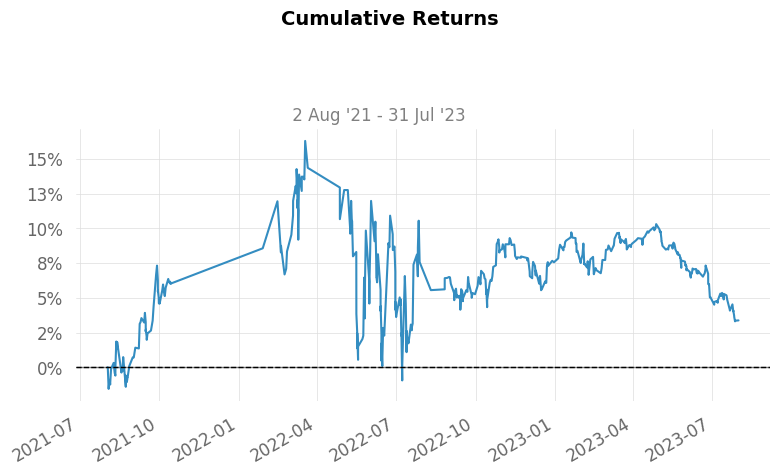

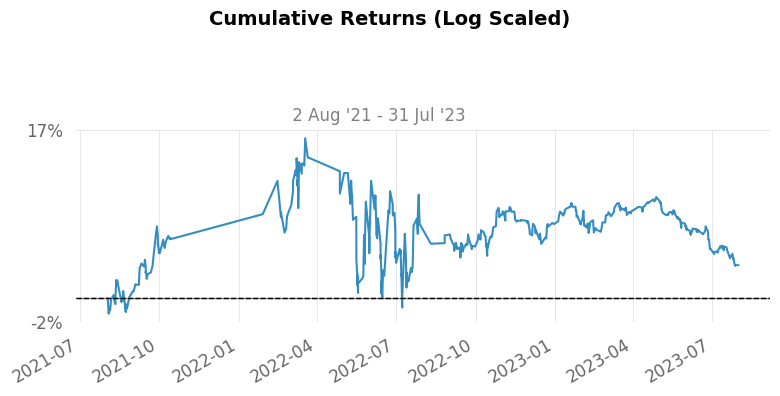

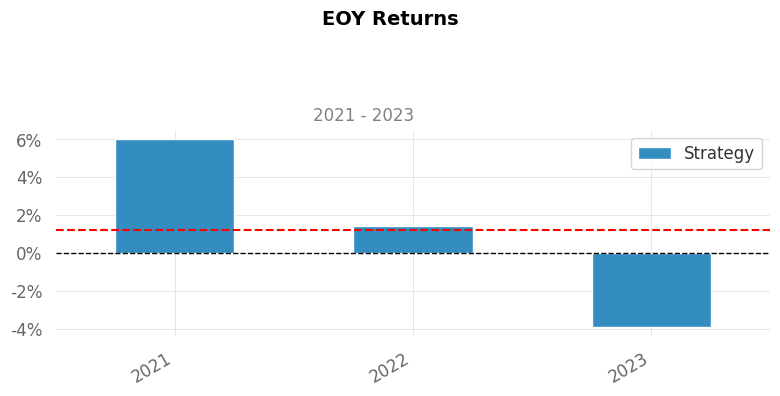

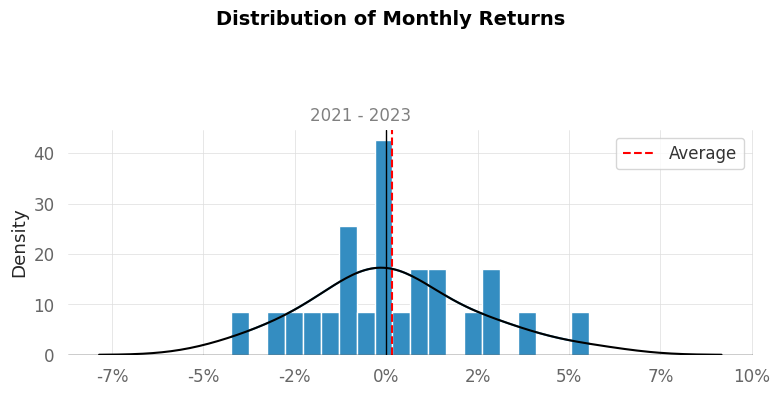

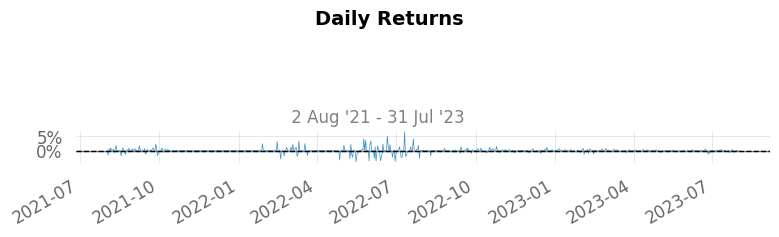

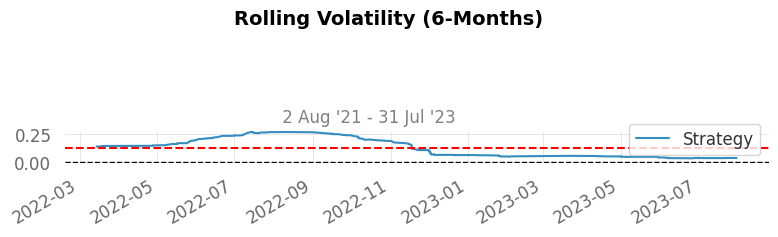

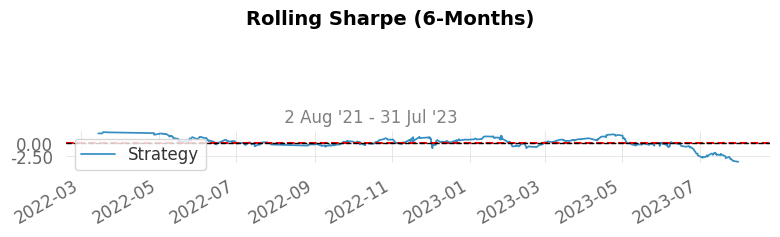

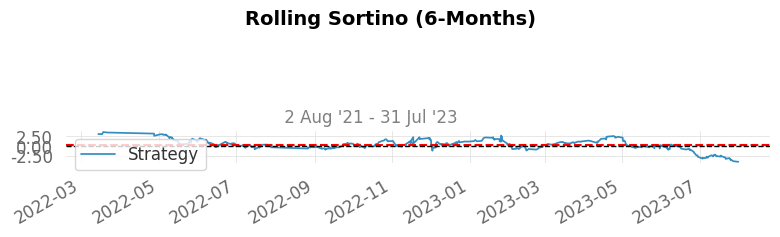

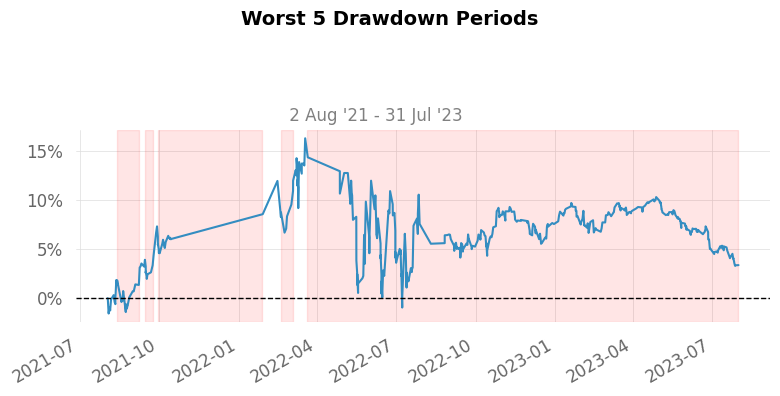

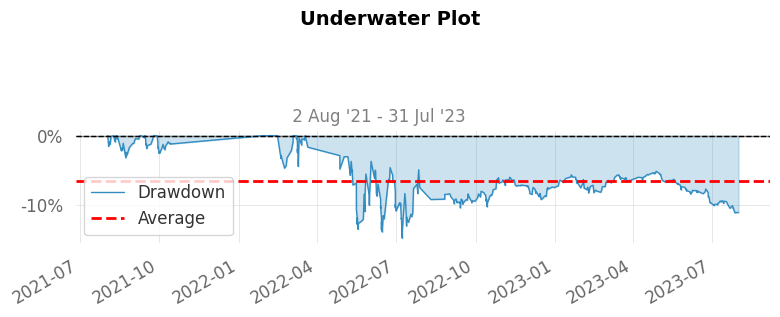

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


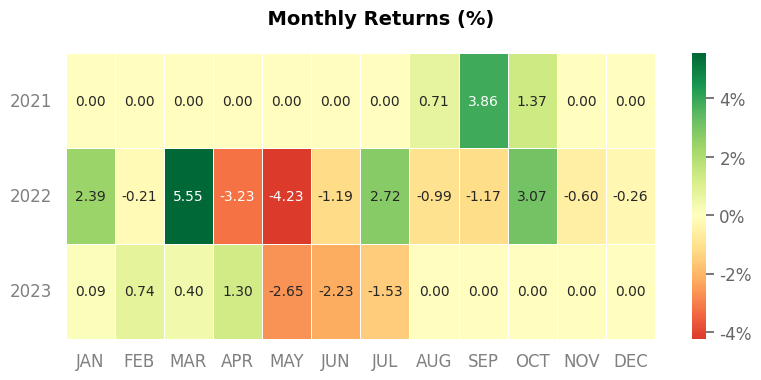

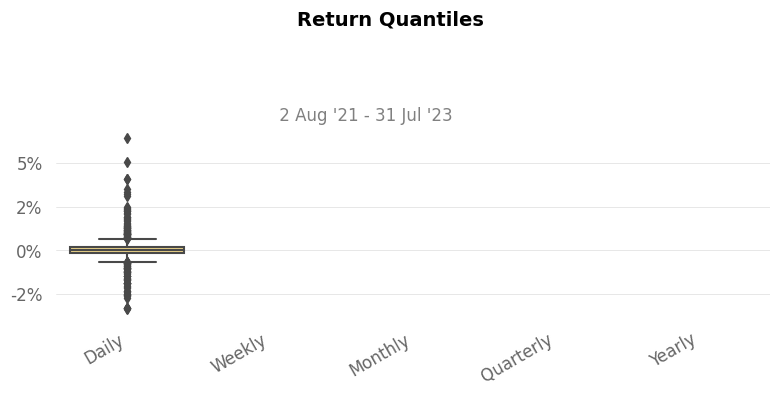

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [20]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True, initial_funds=initial_virtual_funds)

## Order History

In [21]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+----------------+---------------------------+----------------------------------+------+
| INST           | TIME                      | ID                               | TT   |
|----------------+---------------------------+----------------------------------+------|
| NASDAQ_EQ:TSLA | 2021-08-02 12:30:00-04:00 | 99561a062a1c41b18f6c83d656824eee | SELL |
+----------------+---------------------------+----------------------------------+------+
+----+----------------------------------+------------------------+-------+
|    | TIME                             | STATE                  | MSG   |
|----+----------------------------------+------------------------+-------|
|  0 | 2021-08-02 12:30:00.500000-04:00 | PUT ORDER REQ RECEIVED |       |
|  1 | 2021-08-02 12:30:00.500000-04:00 | VALIDATION PENDING     |       |
|  2 | 2021-08-02 12:30:00.500000-04:00 | OPEN PENDING           |       |
|  3 | 2021-08-02 12:30:00.500000-04:00 | OPEN                   |       |
|  4 | 2021-08-02 12:30:00.5

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

### Start

In [22]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:TSLA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)


Starting the strategy 'VWAP Crossover US' in REALTRADING mode...
╒═════════════════╤═══════════════════════════╕
│ Config          │ Value                     │
╞═════════════════╪═══════════════════════════╡
│ Vendor Name     │ ALPACAV2                  │
├─────────────────┼───────────────────────────┤
│ Broker Name     │ ALPACAV2                  │
├─────────────────┼───────────────────────────┤
│ Strategy Name   │ VWAP Crossover US         │
├─────────────────┼───────────────────────────┤
│ Trading Type    │ REALTRADING               │
├─────────────────┼───────────────────────────┤
│ Instrument(s)   │ ['NASDAQ:TSLA']           │
├─────────────────┼───────────────────────────┤
│ Quantity/Lots   │ 5                         │
├─────────────────┼───────────────────────────┤
│ Start Timestamp │ 2023-08-23 08:00:00-04:00 │
├─────────────────┼───────────────────────────┤
│ End Timestamp   │ 2023-08-23 15:00:00-04:00 │
├─────────────────┼───────────────────────────┤
│ Parameters      │ {'

### Status

In [23]:
connection.get_realtrading_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [24]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

[2023-08-23 18:32:02] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-23 18:32:02] Sanity checks on cfg successful.
[2023-08-23 18:32:02] Currency set to "USD"
[2023-08-23 18:32:02] Setting up broker connection...
[2023-08-23 18:32:04] Fetching broker specific (ALPACAV2) fresh instruments data...
[2023-08-23 18:32:11] Broker connection has been setup successfully.
[2023-08-23 18:32:11] (NASDAQ_EQ) Funds available in client's ALPACAV2 account is : USD '3832210.92'
[2023-08-23 18:32:11] [QUERYING] Sanity check: Ensuring all instruments are affordable...
[2023-08-23 18:32:12] [PASSED] Sanity check: All instruments are affordable
[2023-08-23 18:32:12] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-23 18:32:12] Welcome PA327K1V17PK!
[2023-08-23 18:32:12] Reading strategy...
[2023-08-23 18:32:14] Entering Realtrading mode. Henceforth, all timestamps will

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)